# Exploratory Data Analysis

## Features

### Numerical Data
* Budget
* id
* imdb_id 
* popularity
* release date
* revenue
* runtime
* vote_count
* IMDB Score


### Categorical Data
* Genre
* Language
* Production Companies
* Production Countries
* spoken languages
* Adult

### Text Data
* homepage 
* title  
* status 
* tagline
* cast
* crew
* Imdb Link               


### Image Data
* posterID
* Poster                
* num_faces              
* brightness             
* saturation             
* hue                    
* brightness_sd          
* saturation_sd          
* hue_sd                 
* blue                   
* blue_sd                
* green                 
* green_sd               
* red                    
* red_sd   



In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud
from ast import literal_eval
import itertools
import spacy
import re
import nltk
spacy.load('en_core_web_sm')

# genres, adult, original language, production companies,production countries,realease year,runtime, cast, numfaces(???)

In [2]:
preprocessedDF = pd.read_csv('Dataset/preprocessed.csv')

In [3]:
preprocessedDF.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'posterID', 'cast', 'crew', 'keywords',
       'Imdb Link', 'Title', 'IMDB Score', 'Genre', 'Poster', 'num_faces',
       'brightness', 'saturation', 'hue', 'brightness_sd', 'saturation_sd ',
       'hue_sd', 'blue', 'blue_sd', 'green', 'green_sd', 'red', 'red_sd '],
      dtype='object')

In [4]:
preprocessedDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37210 entries, 0 to 37209
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  37210 non-null  bool   
 1   belongs_to_collection  3918 non-null   object 
 2   budget                 37210 non-null  int64  
 3   genres                 37210 non-null  object 
 4   homepage               6307 non-null   object 
 5   id                     37210 non-null  int64  
 6   imdb_id                37210 non-null  int64  
 7   original_language      37205 non-null  object 
 8   original_title         37210 non-null  object 
 9   overview               36573 non-null  object 
 10  popularity             37210 non-null  float64
 11  poster_path            37210 non-null  object 
 12  production_companies   37210 non-null  object 
 13  production_countries   37210 non-null  object 
 14  release_date           37189 non-null  object 
 15  re

In [5]:
preprocessedDF.describe()

,budget,id,imdb_id,popularity,revenue,runtime,vote_average,vote_count,IMDB Score,num_faces,...,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd
count,3.721000e+04,37210.000000,3.721000e+04,37210.000000,3.721000e+04,37062.000000,37210.000000,37210.000000,37193.000000,37210.000000,...,37210.000000,37210.000000,37210.000000,37210.000000,37210.000000,37210.000000,37210.000000,37210.000000,37210.000000,37210.000000
mean,4.711716e+06,92095.604327,8.350883e+05,3.114066,1.252765e+07,96.065242,5.717186,123.099973,6.409185,0.563612,...,54.121472,72.888216,66.108829,44.692045,102.676043,69.147140,112.402166,72.107912,127.214442,75.265465
std,1.820269e+07,97166.149197,1.144543e+06,5.596429,6.719505e+07,37.338853,1.796600,518.225290,1.142621,0.922337,...,28.890712,15.745163,19.977247,16.171165,49.732066,18.623296,48.762495,16.121290,51.192335,15.793882
min,0.000000e+00,2.000000,3.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.200000,0.000000,...,0.000000,1.183370,0.000000,0.000000,0.882752,1.977672,0.726561,1.651825,1.337270,1.244778
25%,0.000000e+00,22969.250000,8.093450e+04,0.453325,0.000000e+00,86.000000,5.100000,4.000000,5.800000,0.000000,...,30.549816,62.818346,53.854725,34.489826,63.103481,56.652542,73.914467,61.786961,87.503894,65.441396
50%,0.000000e+00,51789.000000,2.363165e+05,1.290035,0.000000e+00,95.000000,6.000000,11.000000,6.600000,0.000000,...,50.157406,73.247646,66.716290,45.677917,98.034244,69.919507,110.593031,72.334171,127.259378,75.881237
75%,0.000000e+00,125163.250000,1.327770e+06,4.358514,0.000000e+00,108.000000,6.800000,42.000000,7.200000,1.000000,...,74.505922,83.473024,79.505317,55.664458,139.488232,82.423853,149.611802,82.938145,167.770281,86.003713
max,3.800000e+08,469172.000000,6.098922e+06,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,9.500000,16.000000,...,174.309900,125.836770,125.016174,88.502696,253.928587,125.838671,251.624791,125.841819,253.605869,125.837170


In [6]:
all_data = preprocessedDF

In [7]:
len(all_data)

37210

Null values in each column

In [8]:
all_data.isnull().sum()

adult                        0
belongs_to_collection    33292
budget                       0
genres                       0
homepage                 30903
id                           0
imdb_id                      0
original_language            5
original_title               0
overview                   637
popularity                   0
poster_path                  0
production_companies         0
production_countries         0
release_date                21
revenue                      0
runtime                    148
spoken_languages             0
status                      54
tagline                  19400
title                        0
video                        0
vote_average                 0
vote_count                   0
posterID                     0
cast                         0
crew                         0
keywords                     0
Imdb Link                    0
Title                        0
IMDB Score                  17
Genre                      122
Poster  

Proper count of null values

In [9]:
print("Col_Name",end='  ')
print("Count")
for col in all_data.columns:
    count=all_data[col].isnull().sum()
    if all_data[col].dtypes !=bool:
        
        count=count+(all_data[col]==0).sum()  #val is zero
        count=count+(all_data[col]=='').sum()
        count=count+(all_data[col]=='0').sum()
        print(col,end=' ')
        print(count)
    else:
        print(col,end='  ')
        print(count)

Col_Name  Count
adult  0
belongs_to_collection 33292
budget 29281
genres 0
homepage 30903
id 0
imdb_id 0
original_language 5
original_title 0
overview 637
popularity 20
poster_path 0
production_companies 0
production_countries 0
release_date 21
revenue 30418
runtime 1193
spoken_languages 0
status 54
tagline 19400
title 0
video  0
vote_average 1987
vote_count 1916
posterID 0
cast 0
crew 0
keywords 0
Imdb Link 0
Title 0
IMDB Score 17
Genre 122
Poster 506
num_faces 23610
brightness 0
saturation 245
hue 245
brightness_sd 0
saturation_sd  245
hue_sd 245
blue 0
blue_sd 0
green 0
green_sd 0
red 0
red_sd  0


In [10]:
all_data.shape

(37210, 46)

In [11]:
all_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,48.908106,94.073346,70.979805,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,43.298337,71.637853,74.316934,57.431210,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,19.093691,102.482222,85.251258,28.312941,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367


In [12]:
all_data['budget'].value_counts()

0           29281
5000000       241
10000000      228
20000000      220
15000000      211
            ...  
60795000        1
12468389        1
49900000        1
8358460         1
24500           1
Name: budget, Length: 1122, dtype: int64

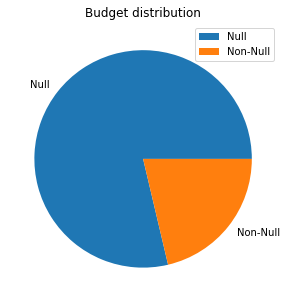

<Figure size 1440x360 with 0 Axes>

In [13]:
budget=[]
null_budget=all_data['budget'].isnull().sum()+(all_data['budget']==0).sum()
non_null_budget=len(all_data['budget'])-null_budget

budget.append(null_budget)
budget.append(non_null_budget)
lab=["Null","Non-Null"]
plt.rcParams["figure.figsize"] = (20, 5)
patches,text=plt.pie(budget,labels=lab)
plt.title("Budget distribution")
plt.legend(patches,lab , loc="upper right")
plt.show()
plt.savefig('Images/budget_data_distribution.png', dpi = 200)

Adult rated movies distribution

In [14]:
all_data['adult'].value_counts()

False    37204
True         6
Name: adult, dtype: int64

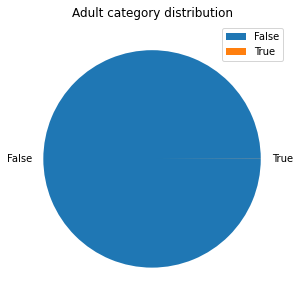

<Figure size 1440x360 with 0 Axes>

In [15]:
#Counts of Adult rated Movies
Lang_count=np.array(all_data['adult'].value_counts())
lab=all_data['adult'].value_counts().index
patches,text=plt.pie(Lang_count,labels=lab)
plt.title("Adult category distribution")
plt.legend(patches, lab, loc="best")
plt.show()
plt.savefig('Images/adult_data_distribution.png', dpi = 200)

 dictionary  function

In [16]:
def get_words(message, tokenizer = None):
    if tokenizer:
        print(message)
        doc = tokenizer(message)
        return [i.text for i in doc]
    else:
        return message.lower().split('|')

def create_dictionary(messages, min_count = 5, tokenizer = None):
    words_count = {}
    for i in tqdm(range(len(messages))):
        s = messages[i]
        words = get_words(s, tokenizer)
        words_unique = list(dict.fromkeys(words))
        for w in words_unique:
            if w not in words_count:
                words_count[w] = 1
            else:
                words_count[w] += 1

    for word in list(words_count.keys()):
        if word=='' or words_count[word] < min_count:
            del words_count[word]

    

    return words_count

In [17]:
# min count is denoting the minimum number of times a word has to appear in the corpus to be included in the dictionary
genre_dictionary = create_dictionary( all_data['Genre'].astype(str).values, min_count=5)

genre_dictionary  #list of genre occuring more than 5 times



100%|██████████| 37210/37210 [00:00<00:00, 127569.50it/s]


{'animation': 1615,
 'adventure': 3573,
 'comedy': 11852,
 'action': 4986,
 'family': 1988,
 'romance': 5749,
 'drama': 18615,
 'crime': 4933,
 'thriller': 4537,
 'fantasy': 1886,
 'horror': 3780,
 'biography': 1841,
 'history': 1304,
 'mystery': 2234,
 'sci-fi': 1883,
 'war': 1093,
 'sport': 651,
 'music': 1187,
 'documentary': 3443,
 'musical': 799,
 'western': 805,
 'short': 968,
 'film-noir': 383,
 'nan': 122,
 'talk-show': 5,
 'news': 75,
 'adult': 13}

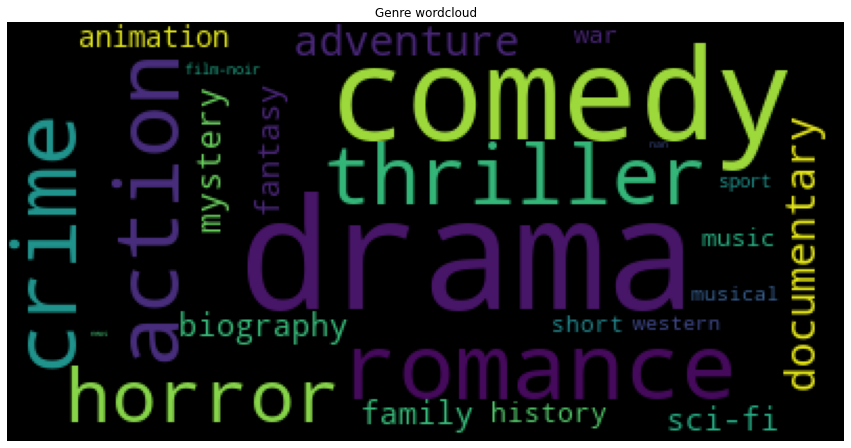

<Figure size 1440x360 with 0 Axes>

In [18]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=genre_dictionary )
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.title("Genre wordcloud")
plt.axis("off")
plt.show()
plt.savefig('Images/genre_word_cloud.png', dpi = 200)

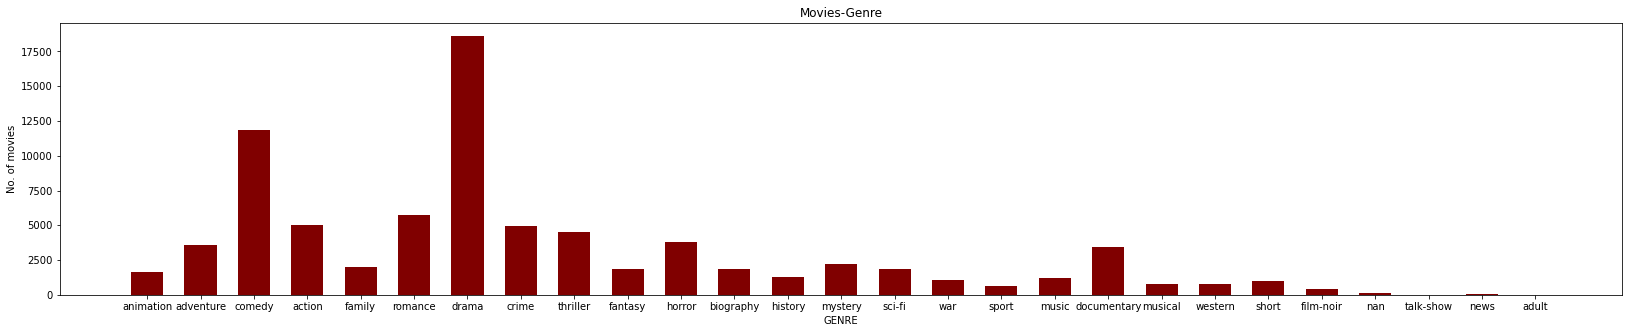

<Figure size 2016x360 with 0 Axes>

In [19]:
plt.rcParams["figure.figsize"] = (28, 5)
plt.bar(genre_dictionary.keys(),genre_dictionary.values(), color ='maroon',
        width = 0.6)
 
plt.xlabel("GENRE")
plt.ylabel("No. of movies")
plt.title("Movies-Genre")
plt.show()
plt.savefig('Images/genre_bar_plot.png', dpi = 200)
#remove other genre

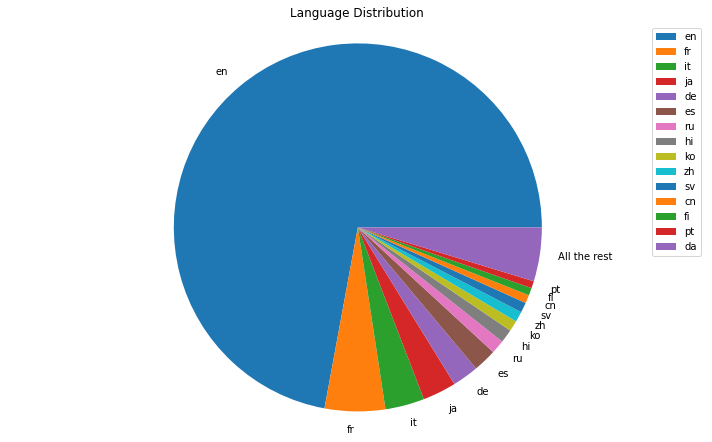

<Figure size 2016x360 with 0 Axes>

In [20]:
#Counts of Languages in Movies
dic={}
lab=all_data['original_language'].value_counts().index
Lang_count=np.array(all_data['original_language'].value_counts())
for i in range(len(lab)):
    dic[lab[i]]=Lang_count[i]


#remove other languages
# group together all elements in the dictionary whose value is less than 50
# name this group 'All the rest'

newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<200) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels_LANG = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots(figsize=(10,6))

patches,text=ax.pie(sizes, labels=labels_LANG, startangle=0)
plt.legend(patches, lab, loc="best",prop={'size': 10})
ax.axis('equal')
plt.tight_layout()
plt.title('Language Distribution')
plt.show()
plt.savefig('Images/lang_distribution_pie_chart.png', dpi = 200)

In [21]:
all_data['original_language'].value_counts()

en    26824
fr     1975
it     1280
ja     1097
de      858
      ...  
ay        1
qu        1
jv        1
fy        1
mt        1
Name: original_language, Length: 87, dtype: int64

In [22]:
def get_production_companies(l):
  if isinstance(l, list):
    productionCompanies = [pc['name'] for pc in l]
    return '|'.join(productionCompanies)
  

In [23]:
ProductionCompanies=all_data['production_companies'].apply(literal_eval).apply(get_production_companies)
all_data['production_companies']=ProductionCompanies

In [24]:
# min count is denoting the minimum number of times a word has to appear in the corpus to be included in the dictionary
production_house_dictionary = create_dictionary( all_data['production_companies'].astype(str).values, min_count=10)

100%|██████████| 37210/37210 [00:00<00:00, 211046.65it/s]


In [25]:
print(len(production_house_dictionary))

812


In [26]:
print(production_house_dictionary)

{'pixar animation studios': 46, 'tristar pictures': 190, 'interscope communications': 35, 'warner bros.': 1138, 'twentieth century fox film corporation': 777, 'sandollar productions': 10, 'touchstone pictures': 222, 'regency enterprises': 99, 'paramount pictures': 918, 'scott rudin productions': 43, 'mirage enterprises': 23, 'walt disney pictures': 231, 'universal pictures': 763, 'united artists': 260, 'eon productions': 23, 'columbia pictures': 406, 'castle rock entertainment': 77, 'amblin entertainment': 75, 'hollywood pictures': 84, 'cinergi pictures entertainment': 16, 'le studio canal+': 12, 'metro-goldwyn-mayer (mgm)': 971, 'carolco pictures': 41, 'columbia pictures corporation': 421, 'miramax films': 177, 'morgan creek productions': 55, 'jersey films': 20, 'new regency pictures': 49, 'silver pictures': 48, 'canal+': 388, 'dino de laurentiis company': 28, 'caravan pictures': 27, 'new line cinema': 261, 'bbc films': 119, 'procirep': 39, 'france 3 cinã©ma': 56, 'eurimages': 63, 'me

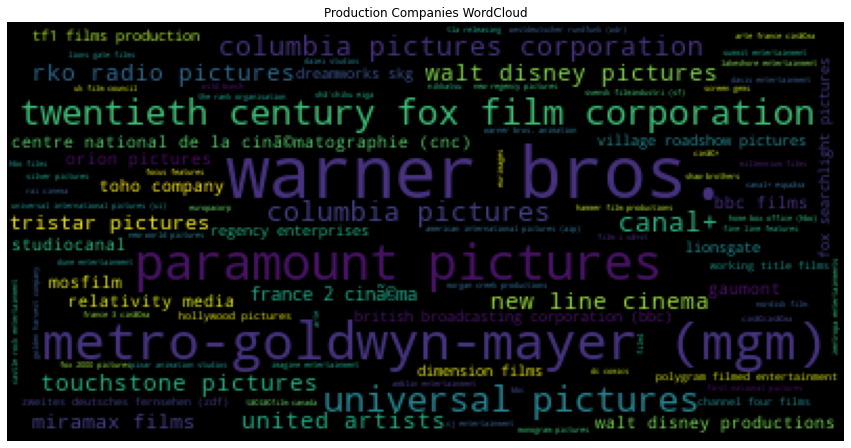

<Figure size 2016x360 with 0 Axes>

In [27]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=production_house_dictionary)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Production Companies WordCloud')
plt.show()
plt.savefig('Images/production_companies_word_cloud.png', dpi = 200)

Production Countries

In [28]:
def get_production_countries(l):
  if isinstance(l, list):
    productionCountries = [pc['iso_3166_1'] for pc in l]
    return '|'.join(productionCountries)

In [29]:
production_countries = all_data['production_countries'].apply(literal_eval).apply(get_production_countries)
all_data['production_countries']=production_countries

In [30]:
production_countries_dictionary = create_dictionary(all_data['production_countries'].astype(str).values, min_count=10)

100%|██████████| 37210/37210 [00:00<00:00, 215645.00it/s]


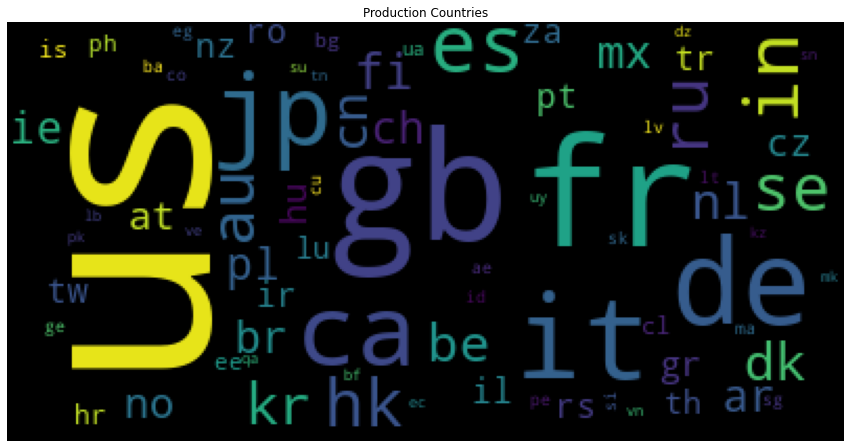

<Figure size 2016x360 with 0 Axes>

In [31]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=production_countries_dictionary)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Production Countries")
plt.show()
plt.savefig('Images/production_countries_word_cloud.png', dpi = 200)

Get year from realease data

In [32]:
all_data['release_date']=pd.DatetimeIndex(all_data['release_date']).year

In [33]:
# make group for each year and count the number of movies in each year 
all_data['release_date'].value_counts()



2014.0    1605
2013.0    1603
2012.0    1449
2011.0    1414
2015.0    1400
          ... 
1878.0       1
1893.0       1
2020.0       1
1887.0       1
1899.0       1
Name: release_date, Length: 133, dtype: int64

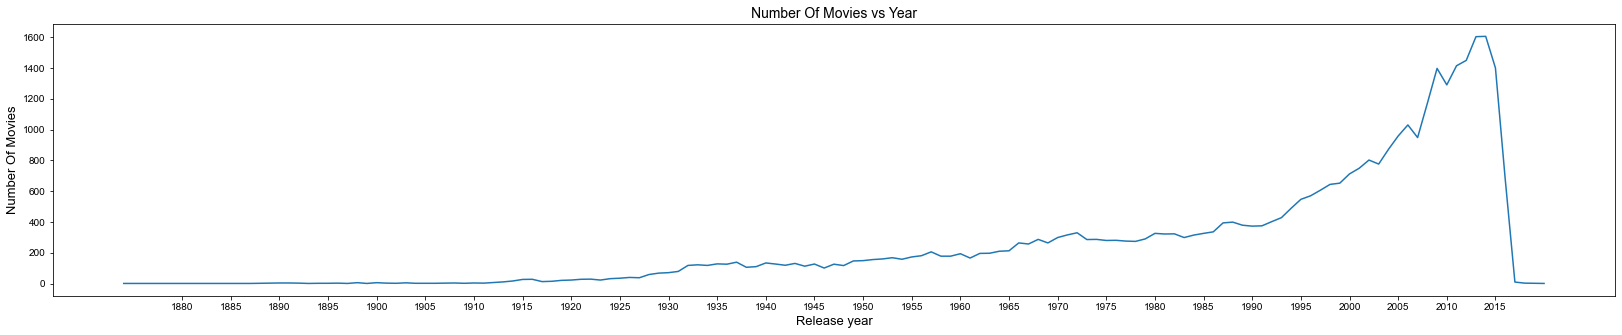

In [34]:
#make group of the data according to their release year and count the total number of movies in each year and pot.
all_data.groupby((all_data['release_date'])).count()['id'].plot(xticks = np.arange(1880,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(20,10)})
plt.title("Number Of Movies vs Year",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")
plt.savefig('Images/Realease_year_bar_plot.png', dpi = 200)

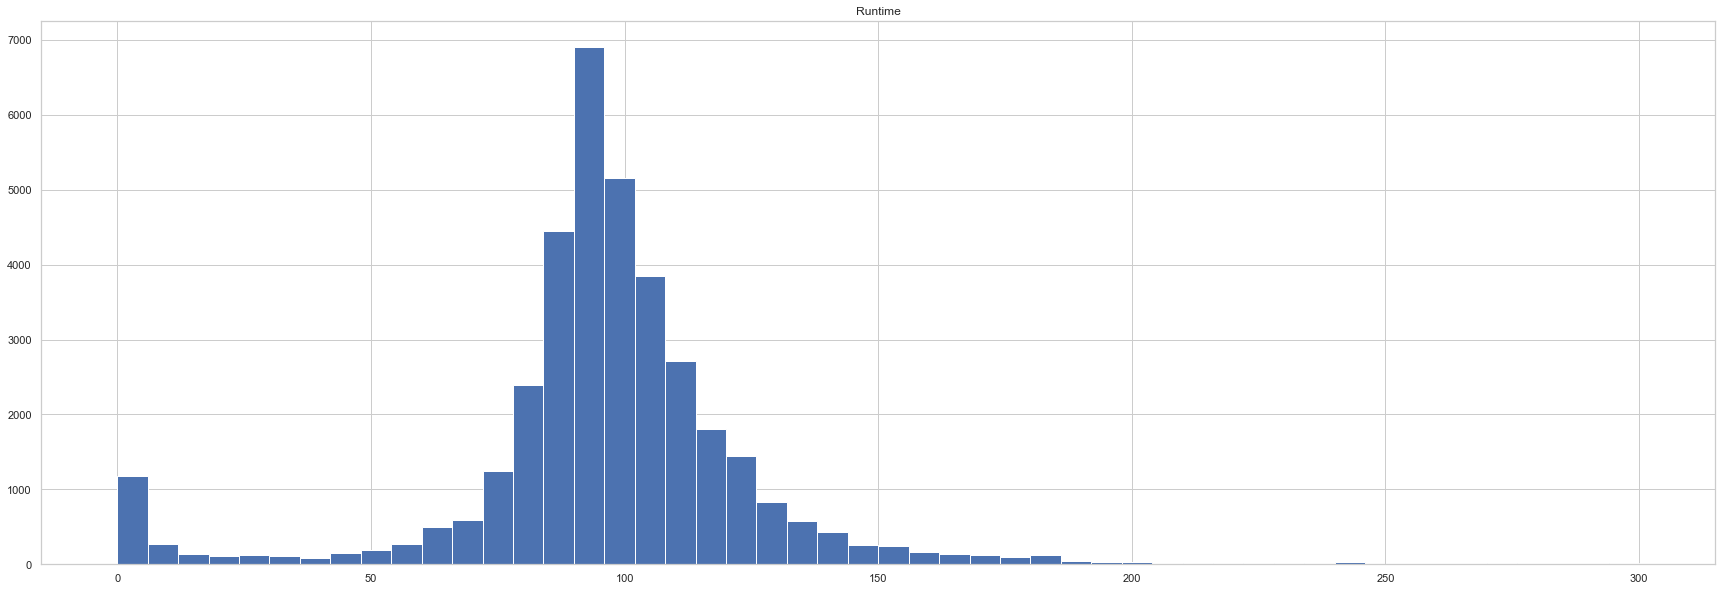

<Figure size 2160x720 with 0 Axes>

In [35]:
plt.rcParams["figure.figsize"] = (30, 10)
plt.hist(all_data['runtime'], range=[0, 300], bins = 50)
plt.title("Runtime")
plt.show()
plt.savefig('Images/Runtime_bar_plot.png', dpi = 200)

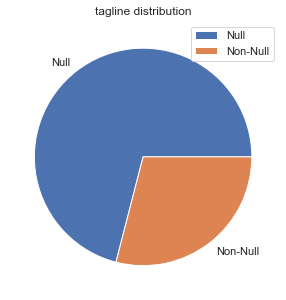

<Figure size 1440x360 with 0 Axes>

In [51]:
tagline=[]
null_tagline=all_data['tagline'].isnull().sum()+(all_data['tagline']=='').sum()
non_null_tagline=len(all_data['tagline'])-null_budget

tagline.append(null_tagline)
tagline.append(non_null_tagline)
lab=["Null","Non-Null"]
plt.rcParams["figure.figsize"] = (20, 5)
patches,text=plt.pie(tagline,labels=lab)
plt.title("tagline distribution")
plt.legend(patches,lab , loc="upper right")
plt.show()
plt.savefig('Images/tagline_data_distribution.png', dpi = 200)

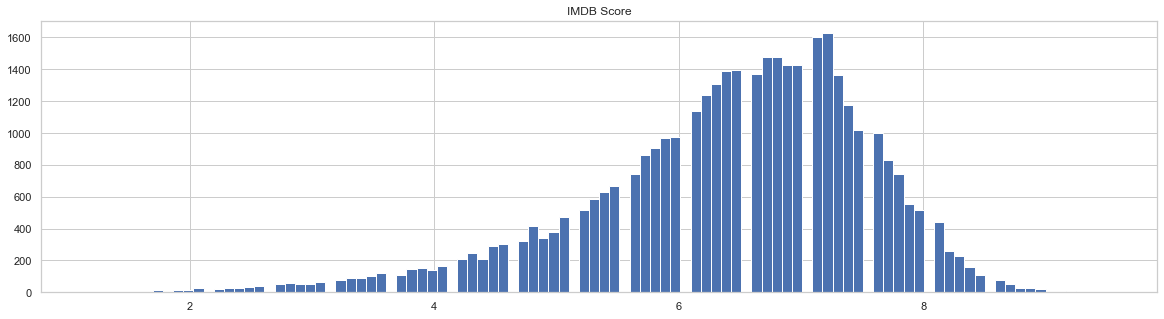

<Figure size 1440x360 with 0 Axes>

In [52]:
plt.hist(all_data['IMDB Score'], bins = 100)
plt.title("IMDB Score")
plt.show()
plt.savefig('Images/IMDB_score_plot.png', dpi = 200)

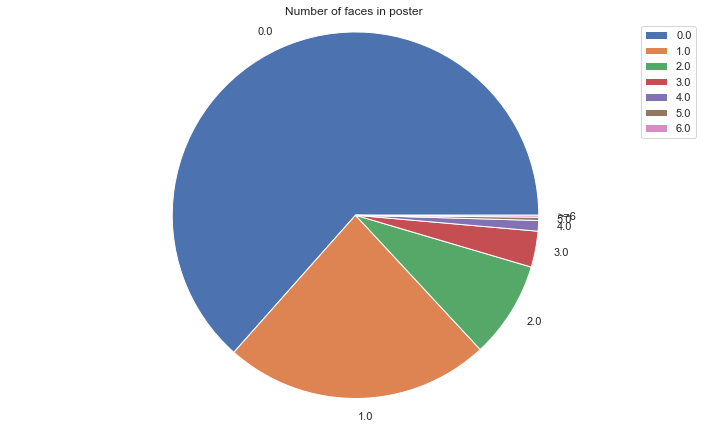

<Figure size 2160x720 with 0 Axes>

In [37]:

#Counts of Num of faces in posters
dic={}
lab=all_data['num_faces'].value_counts().index
face_count=np.array(all_data['num_faces'].value_counts())
for i in range(len(lab)):
    dic[lab[i]]=face_count[i]

# group together all elements in the dictionary where num_faces>=6
# name this group '>=6'
import itertools
newdic={}
for key, group in itertools.groupby(dic, lambda k: '>=6' if (k>=6) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots(figsize=(10,6))

patches,text=ax.pie(sizes, labels=labels)
plt.legend(patches, lab, loc="best")
ax.axis('equal')
plt.title("Number of faces in poster")
plt.tight_layout()

plt.show()
plt.savefig('Images/NumFaces_pie_plot.png', dpi = 200)

In [38]:
all_data['num_faces'].value_counts()

0.0     23610
1.0      8730
2.0      3171
3.0      1182
4.0       347
5.0       107
6.0        43
7.0        11
8.0         4
15.0        1
9.0         1
11.0        1
13.0        1
16.0        1
Name: num_faces, dtype: int64

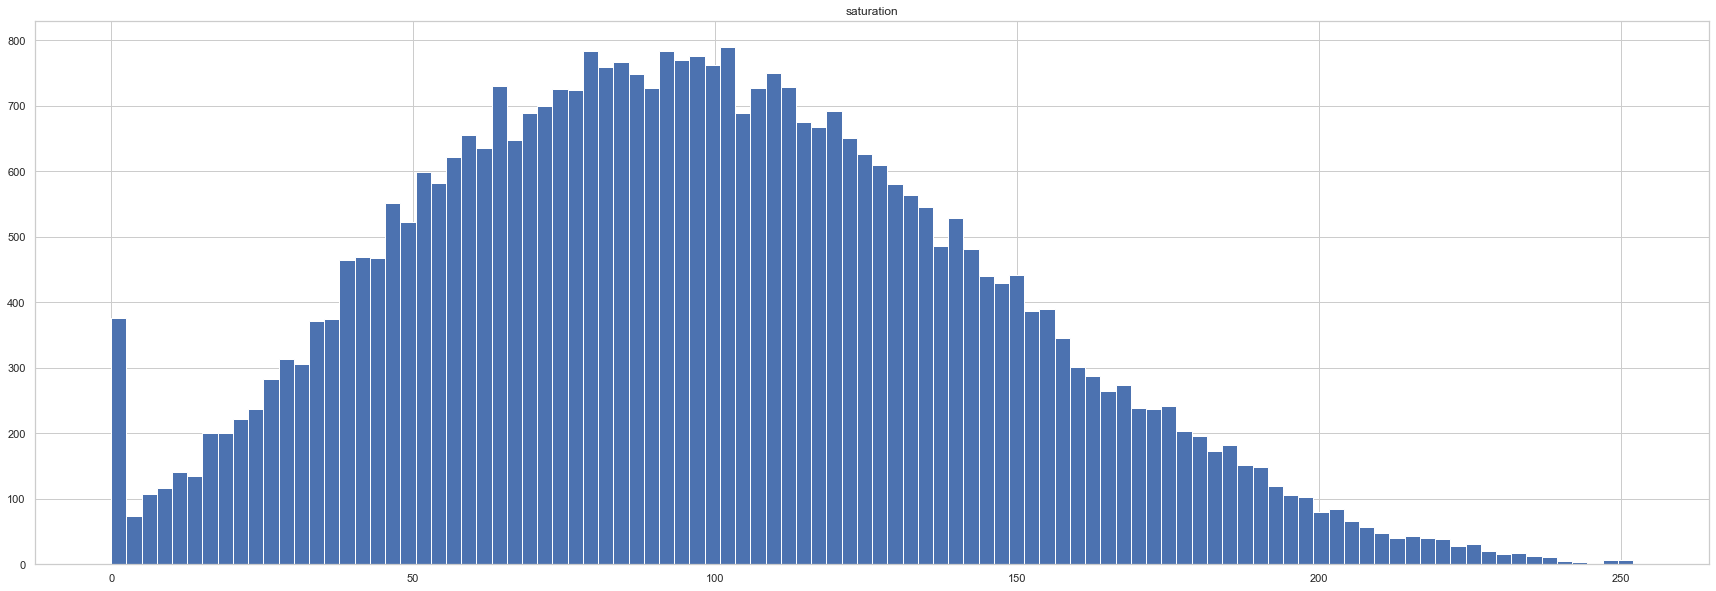

<Figure size 2160x720 with 0 Axes>

In [39]:
plt.hist(all_data['saturation'], bins = 100)
plt.title('saturation')
plt.show()
plt.savefig('Images/Saturation_hist_plot.png', dpi = 200)

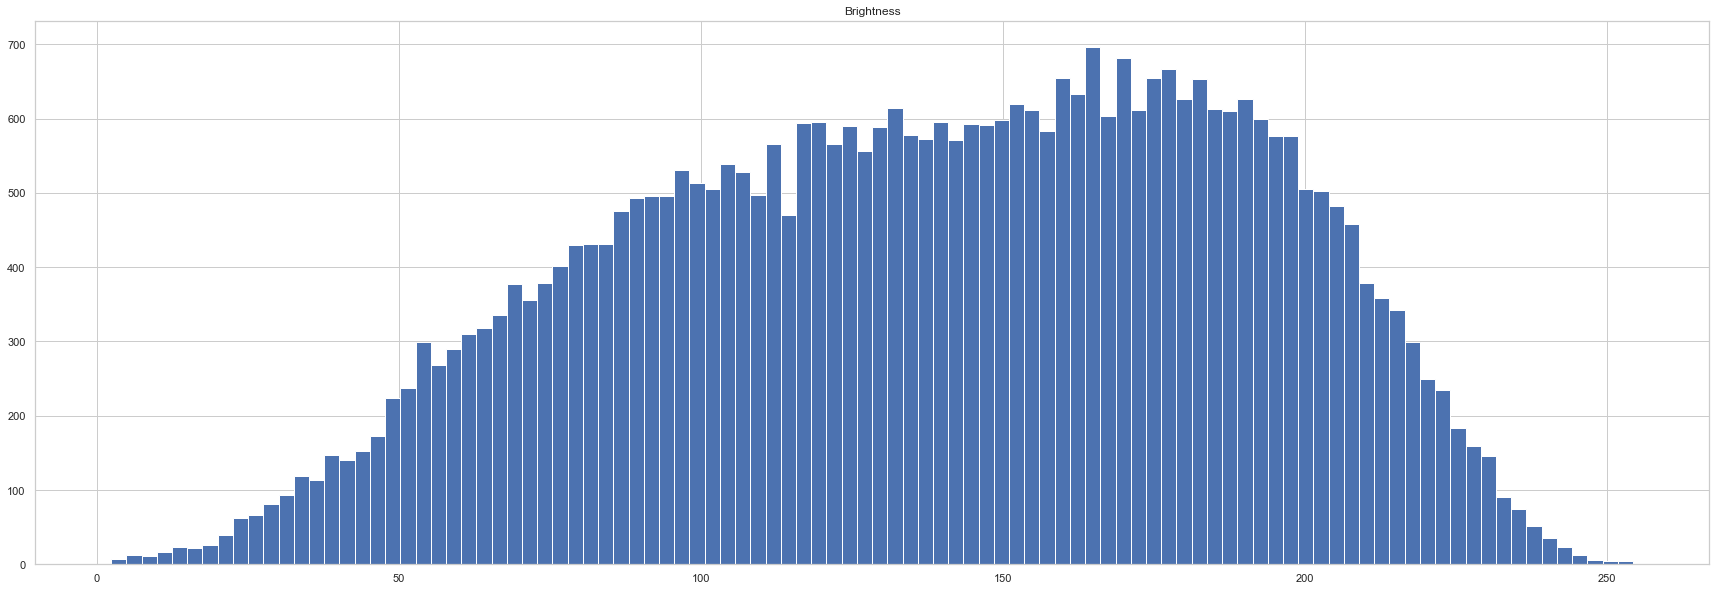

<Figure size 2160x720 with 0 Axes>

In [40]:
plt.hist(all_data['brightness'], bins = 100)
plt.title('Brightness')
plt.show()
plt.savefig('Images/brightness_hist_plot.png', dpi = 200)

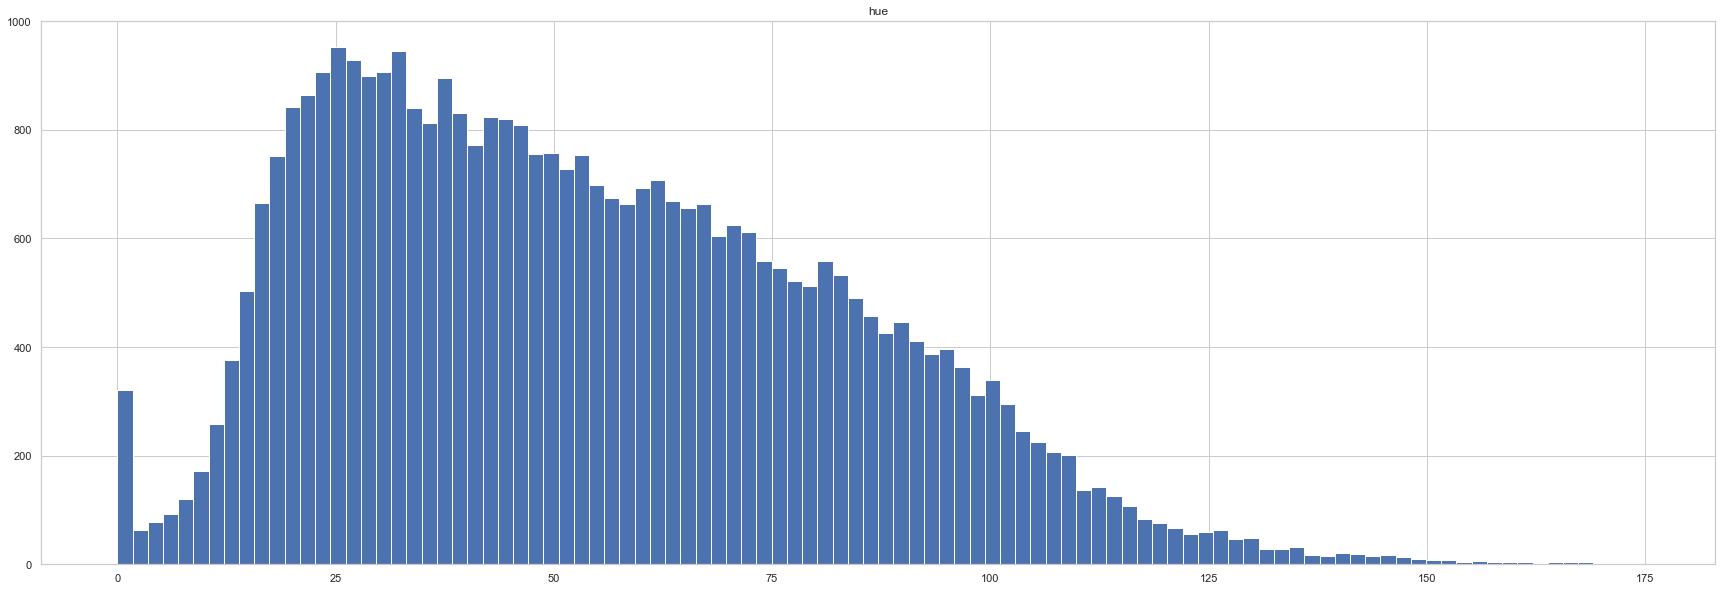

<Figure size 2160x720 with 0 Axes>

In [41]:
plt.hist(all_data['hue'], bins = 100)
plt.title('hue')
plt.show()
plt.savefig('Images/hue_hist_plot.png', dpi = 200)

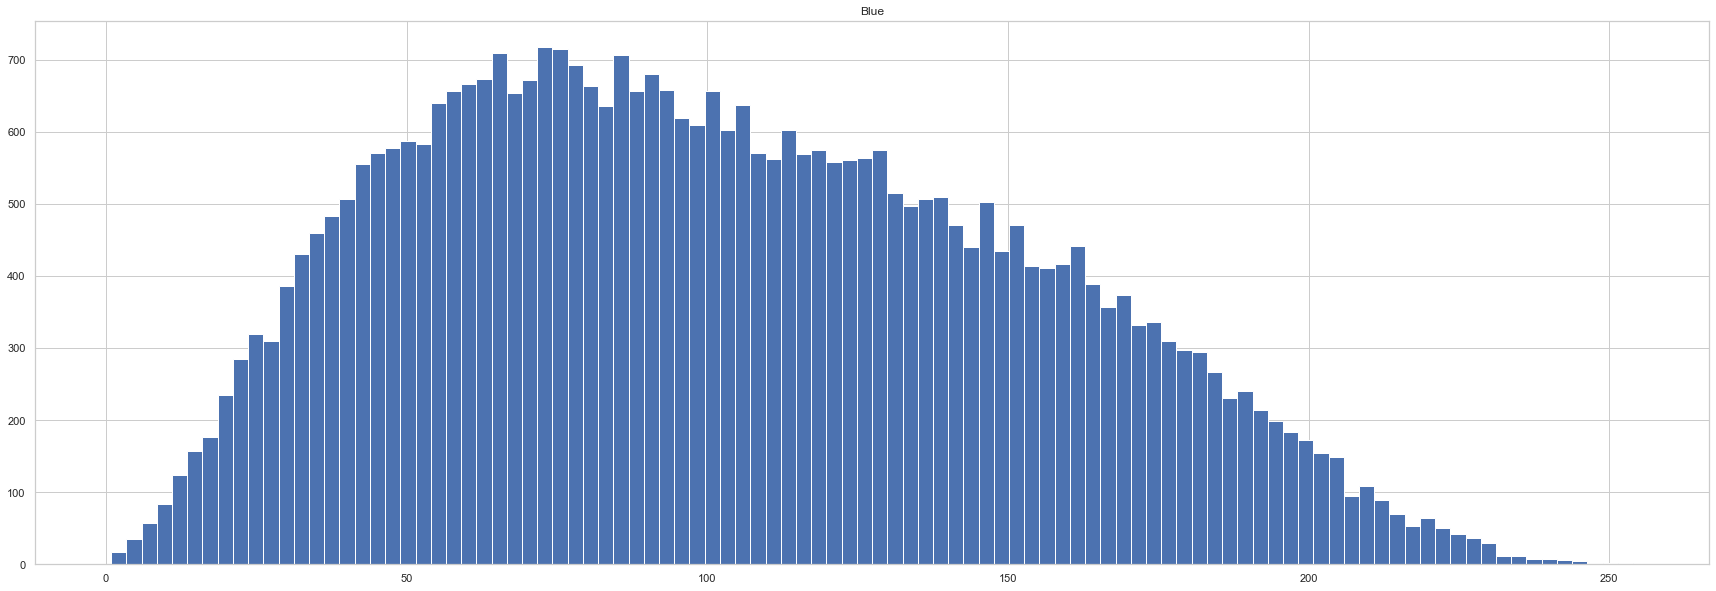

<Figure size 2160x720 with 0 Axes>

In [42]:
plt.hist(all_data['blue'], bins = 100)
plt.title('Blue')
plt.show()
plt.savefig('Images/blue_hist_plot.png', dpi = 200)

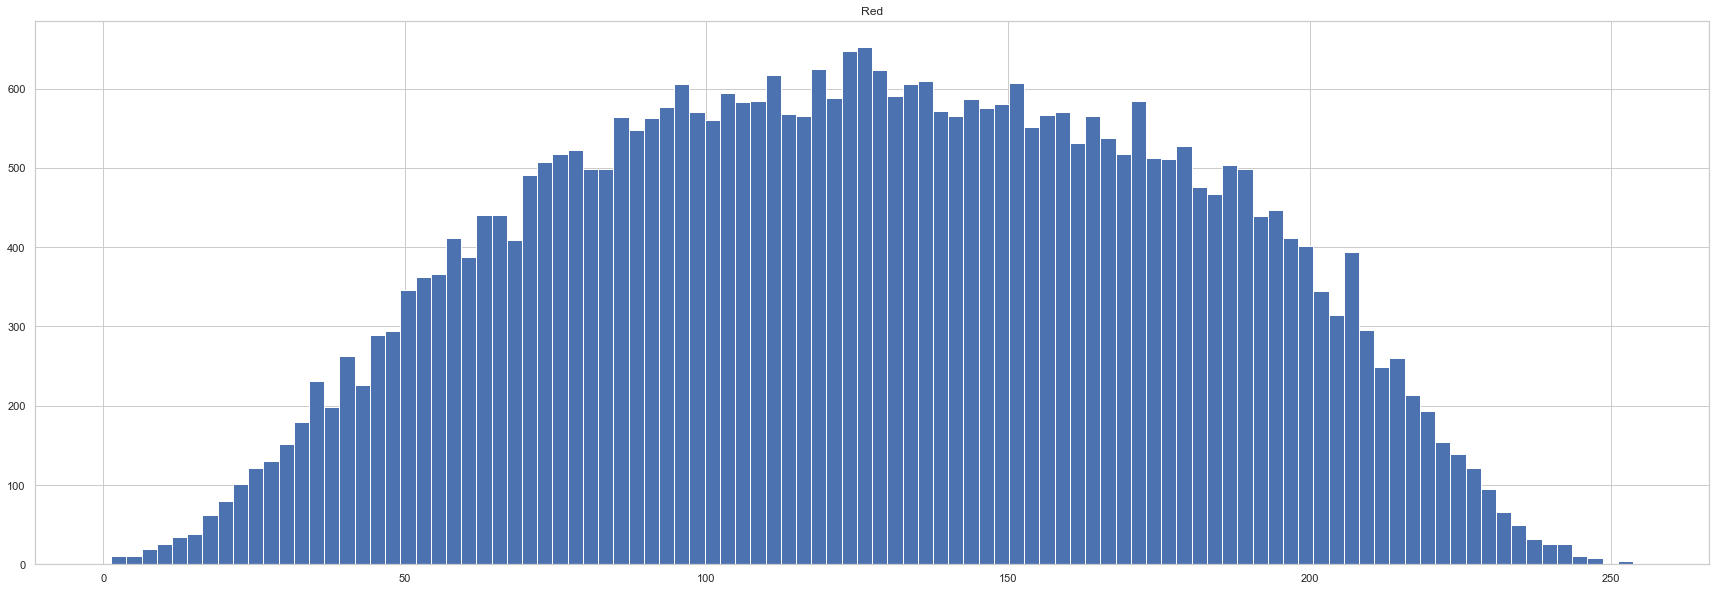

<Figure size 2160x720 with 0 Axes>

In [43]:
plt.hist(all_data['red'], bins = 100)
plt.title('Red')
plt.show()
plt.savefig('Images/red_hist_plot.png', dpi = 200)

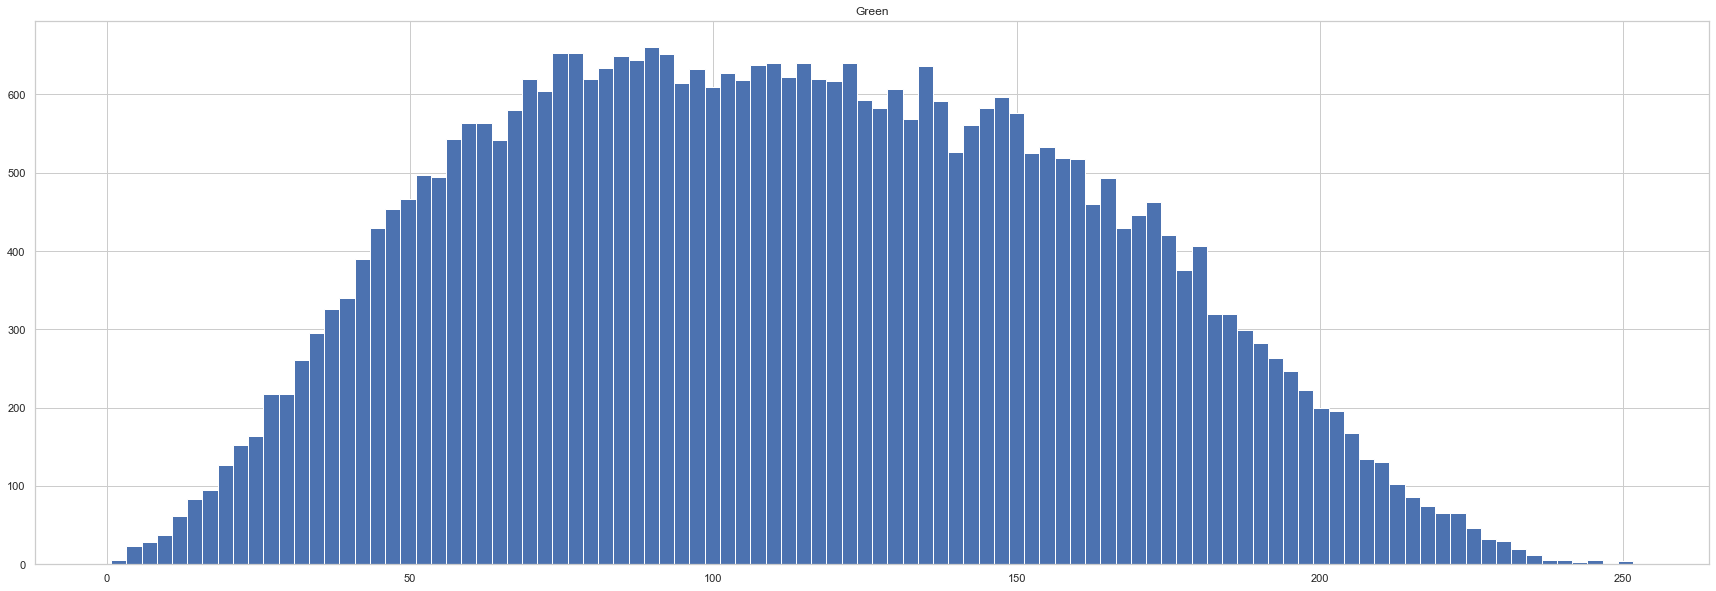

<Figure size 2160x720 with 0 Axes>

In [44]:
plt.hist(all_data['green'], bins = 100)
plt.title('Green')
plt.show()
plt.savefig('Images/green_hist_plot.png', dpi = 200)

In [45]:
stop_words={'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 "shan't",
 'she',
 "she's",
 'should',
 "should've",
 'shouldn',
 "shouldn't",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 've',
 'very',
 'was',
 'wasn',
 "wasn't",
 'we',
 'were',
 'weren',
 "weren't",
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 'y',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves'}

In [46]:

def create_dictionary_overview(messages, min_count, tokenizer):
    

    words_count = {}
    for i in tqdm(range(len(messages))): 
        s = messages[i]
  
        words = get_words(s, tokenizer)
        print(len(words))
        words_unique = list(dict.fromkeys(words))
        for w in words_unique:
          if len(w)<=1 or w.lower()in stop_words:
            continue
          if w.lower() not in words_count:
            words_count[w.lower()] = 1
          else:
            words_count[w.lower()] += 1

    for word in list(words_count.keys()):
        if (words_count[word] < min_count) or word=='':
            del words_count[word]

    index = 1
    for word in list(words_count.keys()):
        words_count[word] = index
        index = index + 1

    return words_count

def get_words_new(message, tokenizer = None):
  if tokenizer:
    doc = tokenizer(message)
    return [i.text for i in doc]
  else:
    return message.lower().split(' ')

def custom_transform(messages, word_dictionary, tokenizer = None):
    words_arr = np.zeros((len(messages), len(word_dictionary)))
    for i in range(words_arr.shape[0]):
        message_words = get_words_new(messages[i], tokenizer)
        message_indices = map(word_dictionary.get, message_words)
        for j in message_indices:
            if j is not None:
                words_arr[i, j-1] += 1
    return words_arr

In [47]:
tokenizer = spacy.load("en_core_web_sm", disable=["tagger", "parser", "ner", "lemmatizer"])
overview_dictionary = create_dictionary_overview(
    all_data['overview'], 30, tokenizer)
print('Size of dictionary: ', len(overview_dictionary))

  0%|          | 6/37210 [00:00<10:24, 59.59it/s]

Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.
59
When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.
74
A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcÃ©e opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is 

  0%|          | 21/37210 [00:00<08:59, 68.96it/s]

51
When a lawyer shows up at the vampire's doorstep, he falls prey to his charms and joins him in his search for fresh blood. Enter Dr. van Helsing, who may be the only one able to vanquish the count.
44
An outcast half-wolf risks his life to prevent a deadly epidemic from ravaging Nome, Alaska.
19
An all-star cast powers this epic look at American President Richard M. Nixon, a man carrying the fate of the world on his shoulders while battling the self-destructive demands within. Spanning his troubled boyhood in California to the shocking Watergate scandal that would end his presidency.
53
Morgan Adams and her slave, William Shaw, are on a quest to recover the three portions of a treasure map. Unfortunately, the final portion is held by her murderous uncle, Dawg. Her crew is skeptical of her leadership abilities, so she must complete her quest before they mutiny against her. This is made yet more difficult by the efforts of the British crown to end her pirate raids.
77
The life of the 

  0%|          | 32/37210 [00:00<08:43, 70.98it/s]


83
In the year 2035, convict James Cole reluctantly volunteers to be sent back in time to discover the origin of a deadly virus that wiped out nearly all of the earth's population and forced the survivors into underground communities. But when Cole is mistakenly sent to 1990 instead of 1996, he's arrested and locked up in a mental hospital. There he meets psychiatrist Dr. Kathryn Railly, and patient Jeffrey Goines, the son of a famous virus expert, who may hold the key to the mysterious rogue group, the Army of the 12 Monkeys, thought to be responsible for unleashing the killer disease.
114
nan


TypeError: object of type 'float' has no len()

In [48]:
def get_keywords(l):
  if isinstance(l, list):
    keyWords = [k['name'] for k in l]
    return '|'.join(keyWords)
all_data['keywords'] = all_data['keywords'].apply(literal_eval).apply(get_keywords)

100%|██████████| 37210/37210 [00:00<00:00, 144214.87it/s]


Size of dictionary:  841


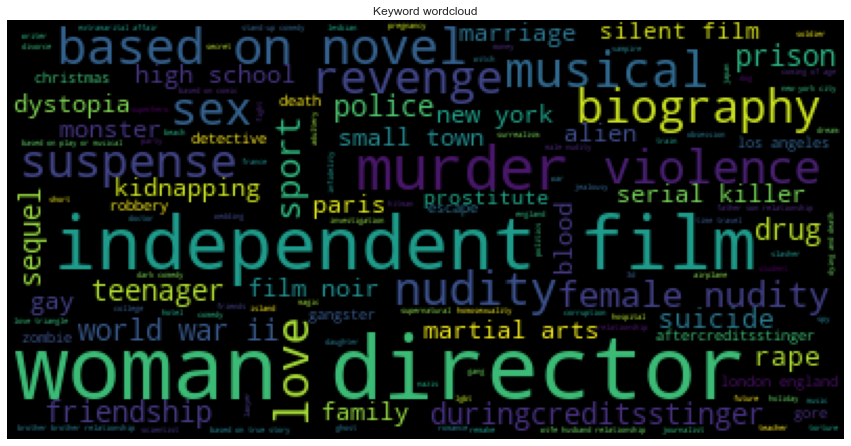

<Figure size 2160x720 with 0 Axes>

In [50]:
keywords_dictionary = create_dictionary(all_data['keywords'].astype(str).values, min_count=30)
print('Size of dictionary: ', len(keywords_dictionary))
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=keywords_dictionary)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Keyword wordcloud")
plt.show()
plt.savefig('Images/keyword_word_cloud.png', dpi = 200)

In [ ]:
score_by_genre = all_data.groupby(['Genre'])['IMDB Score'].agg(
    ['mean', 'count']).sort_values(by='mean')
score_by_genre[score_by_genre['count'] > 0]

In [ ]:
all_data.shape

In [ ]:
all_data.loc[1]

In [ ]:
(all_data.loc[1, 'cast'])

In [ ]:
def get_director(l):
  for d in l:
    if d['job'] == 'Director':
      return d['name']
  return ''

def get_actors(l):
    if isinstance(l, list):
        actors = [d['name'] for d in l]
        if len(actors) >= 3:
            actors = actors[:3]
            return '|'.join(actors)
        return '|'.join(actors)


directors = all_data['crew'].apply(literal_eval).apply(get_director)
top_actors = all_data['cast'].apply(literal_eval).apply(get_actors)

In [ ]:
all_data['director'] = directors
all_data['actors'] = top_actors

In [ ]:
all_data.shape

In [ ]:
cols = ['posterID', 'IMDB Score', 'overview', 'Genre', 'director', 'actors', 'runtime',
        'num_faces', 'hue', 'hue_sd', 'saturation', 'saturation_sd ', 'brightness', 'brightness_sd', 'blue', 'blue_sd', 'green', 'green_sd', 'red', 'red_sd ']
new_cols = ['posterID', 'IMDBscore', 'overview', 'genre', 'director', 'actors', 'runtime',
            'num_faces', 'hue', 'hue_sd', 'saturation', 'saturation_sd', 'brightness', 'brightness_sd', 'blue', 'blue_sd', 'green', 'green_sd', 'red', 'red_sd']

In [ ]:
all_data = all_data[cols]
all_data = all_data.dropna()
print(all_data.shape)

In [ ]:
all_data.columns = new_cols
all_data = all_data.reset_index(drop=True)
print(all_data.shape)

In [ ]:
all_data.info()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_dataset, test_dataset = train_test_split(
    all_data, test_size=0.3, random_state=0)
valid_dataset, test_dataset = train_test_split(
    test_dataset, test_size=0.5, random_state=0)

train_data = train_dataset.reset_index(drop=True)
valid_data = valid_dataset.reset_index(drop=True)
test_data = test_dataset.reset_index(drop=True)

print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)

train_data.to_csv('train.csv', index=False)
valid_data.to_csv('valid.csv', index=False)
test_data.to_csv('test.csv', index=False)

print('')
print(np.cov(train_data['IMDBscore']))
print(np.cov(valid_data['IMDBscore']))
print(np.cov(test_data['IMDBscore']))

In [ ]:



def transform_text(messages, word_dictionary, tokenizer = None):
    words_arr = np.zeros((len(messages), len(word_dictionary)))
    for i in range(words_arr.shape[0]):
        message_words = get_words(messages[i], tokenizer)
        message_indices = map(word_dictionary.get, message_words)
        for j in message_indices:
            if j is not None:
                words_arr[i, j-1] += 1
    return words_arr

In [ ]:
# min count is denoting the minimum number of times a word has to appear in the corpus to be included in the dictionary
genre_dictionary = create_dictionary(
    train_data['genre'].astype(str).values, min_count=5)

In [ ]:
print(genre_dictionary)

In [ ]:
train_genre_matrix = transform_text(
    train_data['genre'].astype(str).values, genre_dictionary)
valid_genre_matrix = transform_text(
    valid_data['genre'].astype(str).values, genre_dictionary)
test_genre_matrix = transform_text(
    test_data['genre'].astype(str).values, genre_dictionary)
# print(genre_dictionary)
print(train_genre_matrix.shape)
print(valid_genre_matrix.shape)
print(test_genre_matrix.shape)


In [ ]:
train_data['genre']

In [ ]:
director_dictionary = create_dictionary(
    train_data['director'].astype(str).values, min_count=5)
print('Size of dictionary: ', len(director_dictionary))
train_director_matrix = transform_text(
    train_data['director'].astype(str).values, director_dictionary)
valid_director_matrix = transform_text(
    valid_data['director'].astype(str).values, director_dictionary)
test_director_matrix = transform_text(
    test_data['director'].astype(str).values, director_dictionary)
# print(director_dictionary)
print(train_director_matrix.shape)
print(valid_director_matrix.shape)
print(test_director_matrix.shape)


In [ ]:
actors_dictionary = create_dictionary(
    train_data['actors'].astype(str).values, min_count=5)
print('Size of dictionary: ', len(actors_dictionary))
train_actors_matrix = transform_text(
    train_data['actors'].astype(str).values, actors_dictionary)
valid_actors_matrix = transform_text(
    valid_data['actors'].astype(str).values, actors_dictionary)
test_actors_matrix = transform_text(
    test_data['actors'].astype(str).values, actors_dictionary)
# print(actors_dictionary)
print(train_actors_matrix.shape)
print(valid_actors_matrix.shape)
print(test_actors_matrix.shape)


In [ ]:
import spacy

In [ ]:
train_overview_matrix.shape

In [ ]:
count = 0
for i in tqdm(range(valid_overview_matrix.shape[0])):
    for j in range(valid_overview_matrix.shape[1]):
        count += valid_overview_matrix[i,j]
count

In [ ]:
tokenizer = spacy.load("en_core_web_sm", disable=["tagger", "parser", "ner", "lemmatizer"])
overview_dictionary = create_dictionary(
    train_data['overview'], min_count=20, tokenizer=tokenizer)
print('Size of dictionary: ', len(overview_dictionary))
train_overview_matrix = transform_text(
    train_data['overview'].astype(str).values, overview_dictionary)
valid_overview_matrix = transform_text(
    valid_data['overview'].astype(str).values, overview_dictionary)
test_overview_matrix = transform_text(
    test_data['overview'].astype(str).values, overview_dictionary)
# print(overview_dictionary)
print(train_overview_matrix.shape)
print(valid_overview_matrix.shape)
print(test_overview_matrix.shape)


In [ ]:
for i in overview_dictionary:
    print(i, overview_dictionary[i])

# Encoding 

In [ ]:
train_data = pd.read_csv('train.csv')
valid_data = pd.read_csv('valid.csv')
test_data = pd.read_csv('test.csv')
train_data = train_data.drop(columns = ['overview','genre','director','actors'])
valid_data = valid_data.drop(columns = ['overview','genre','director','actors'])
test_data = test_data.drop(columns = ['overview','genre','director','actors'])
train_data = pd.concat([train_data, pd.DataFrame(train_genre_matrix, columns = genre_dictionary.keys()), pd.DataFrame(train_director_matrix, columns = director_dictionary.keys()), 
                        pd.DataFrame(train_actors_matrix, columns = actors_dictionary.keys()), pd.DataFrame(train_overview_matrix,  columns = overview_dictionary.keys())], axis=1)
valid_data = pd.concat([valid_data, pd.DataFrame(valid_genre_matrix, columns = genre_dictionary.keys()), pd.DataFrame(valid_director_matrix, columns = director_dictionary.keys()), 
                       pd.DataFrame(valid_actors_matrix, columns = actors_dictionary.keys() ), pd.DataFrame(valid_overview_matrix, columns = overview_dictionary.keys())], axis=1)
test_data = pd.concat([test_data, pd.DataFrame(test_genre_matrix, columns = genre_dictionary.keys()), pd.DataFrame(test_director_matrix, columns = director_dictionary.keys()), 
                       pd.DataFrame(test_actors_matrix, columns = actors_dictionary.keys() ), pd.DataFrame(test_overview_matrix, columns = overview_dictionary.keys())], axis=1)

In [ ]:
train_data.to_csv('train1.csv', index=False)
valid_data.to_csv('valid1.csv', index=False)
test_data.to_csv('test1.csv', index=False)


In [ ]:
train_data = pd.read_csv('train1.csv')
valid_data = pd.read_csv('valid1.csv')
test_data = pd.read_csv('test1.csv')


In [ ]:
train_data.shape

In [ ]:
train_data

## normailizing the data

In [ ]:
for col in ['runtime', 'num_faces', 'hue', 'hue_sd', 'saturation', 'saturation_sd', 'brightness', 'brightness_sd',
            'blue', 'blue_sd', 'green', 'green_sd', 'red', 'red_sd']:
    mean_feature = np.mean(train_data[col])
    sd_feature = np.std(train_data[col])
    if sd_feature != 0:
        train_data[col] = (train_data[col] - mean_feature) / sd_feature
        valid_data[col] = (valid_data[col] - mean_feature) / sd_feature
        test_data[col] = (test_data[col] - mean_feature) / sd_feature
    else:
        train_data[col] = (train_data[col] - mean_feature)
        valid_data[col] = (valid_data[col] - mean_feature)
        test_data[col] = (test_data[col] - mean_feature)


In [ ]:
print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)
train_X = train_data.drop(columns=['posterID', 'IMDBscore'])
valid_X = valid_data.drop(columns=['posterID', 'IMDBscore'])
test_X = test_data.drop(columns=['posterID', 'IMDBscore'])

# Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
print(np.cov(train_data['IMDBscore']))
print(np.cov(valid_data['IMDBscore']))
print(np.cov(test_data['IMDBscore']))


In [ ]:
reg = LinearRegression().fit(train_X, train_data['IMDBscore'])

print('Train R^2: ', reg.score(train_X, train_data['IMDBscore']))
print('Train MSE: ', mean_squared_error(
    reg.predict(train_X), train_data['IMDBscore']))

print('Valid R^2: ', reg.score(valid_X, valid_data['IMDBscore']))
print('Valid MSE: ', mean_squared_error(
    reg.predict(valid_X), valid_data['IMDBscore']))

print('Test R^2: ', reg.score(test_X, test_data['IMDBscore']))
print('Test MSE: ', mean_squared_error(
    reg.predict(test_X), test_data['IMDBscore']))

In [ ]:
reg = Ridge(alpha=10, random_state=0).fit(train_X, train_data['IMDBscore'])

print('Train R^2: ', reg.score(train_X, train_data['IMDBscore']))
print('Train MSE: ', mean_squared_error(
    reg.predict(train_X), train_data['IMDBscore']))

print('Valid R^2: ', reg.score(valid_X, valid_data['IMDBscore']))
print('Valid MSE: ', mean_squared_error(
    reg.predict(valid_X), valid_data['IMDBscore']))

print('Test R^2: ', reg.score(test_X, test_data['IMDBscore']))
print('Test MSE: ', mean_squared_error(
    reg.predict(test_X), test_data['IMDBscore']))


In [ ]:
reg = Lasso(alpha=0.0001, random_state=0).fit(train_X, train_data['IMDBscore'])

print('Train R^2: ', reg.score(train_X, train_data['IMDBscore']))
print('Train MSE: ', mean_squared_error(
    reg.predict(train_X), train_data['IMDBscore']))

print('Valid R^2: ', reg.score(valid_X, valid_data['IMDBscore']))
print('Valid MSE: ', mean_squared_error(
    reg.predict(valid_X), valid_data['IMDBscore']))

print('Test R^2: ', reg.score(test_X, test_data['IMDBscore']))
print('Test MSE: ', mean_squared_error(
    reg.predict(test_X), test_data['IMDBscore']))

In [ ]:
for i in train_X.columns:
    print(i)

In [ ]:
overview_dictionary

In [ ]:
train_X['The'].value_counts()

In [ ]:
reg.feature_importances_

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest

In [ ]:
best_features = SelectKBest(score_func=chi2, k=1000)

In [ ]:
fit = best_features.fit(train_X, train_data['IMDBscore'])

In [ ]:
dfscore = pd.DataFrame(fit.scores_)
dfcolums = pd.DataFrame(train_data.columns)